In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import read_config_utils as cu

import time

import sys
import os

from os.path import exists

In [3]:

#input_dir = 'output-files-bootstrap-test6b-4d-2a'

#input_dir = 'bootstrap-simple-pdf-toy-study6b-2d-v1b'

input_dir = 'output-files-bootstrap-test6b-2d-2a-100k'



ncalc = 1000
npoints = 1000

In [4]:
with open('%s/train-and-true-samples.npy' % input_dir,'rb') as f :
    train_pts = np.load(f)
    train_det_pts = np.load(f)
    true_pts = np.load(f)
    true_det_pts = np.load(f)


In [5]:
train_pts.shape

(100000, 2)

## Check the particle and detector distributions

<function matplotlib.pyplot.show(close=None, block=None)>

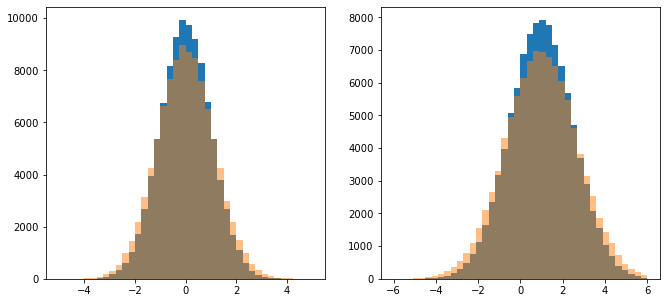

In [6]:
fig,ax = plt.subplots( 1, 2, figsize=(11,5))

hbins=40
x0min=-5
x0max=5
x1min=-6
x1max=6

ax[0].hist( train_pts[:,0], bins=hbins, range=[x0min,x0max] )
ax[0].hist( train_det_pts[:,0], bins=hbins, range=[x0min,x0max], alpha=0.5 )

ax[1].hist( train_pts[:,1], bins=hbins, range=[x1min,x1max] )
ax[1].hist( train_det_pts[:,1], bins=hbins, range=[x1min,x1max], alpha=0.5 )

plt.show

In [7]:
n_samples = 0

for fi in range(1000) :
    
    fname = '%s/bootstrap-weights-%03d.npy' % (input_dir, fi)
    
    if exists(fname) :
        n_samples = n_samples + 1
        
print("\n\n Found %d bootstrap samples.\n\n" % n_samples )



 Found 45 bootstrap samples.




## Load the weights for the first ncalc events from all of the bootstraps

In [8]:
bootstrap_weights = np.zeros( shape = (n_samples, ncalc) )

In [9]:
for fi in range(n_samples) :
    
    fname = '%s/bootstrap-weights-%03d.npy' % (input_dir, fi)
    
    if exists(fname) :
        print( 'loading %s' % fname )
        with open(fname,'rb') as f :
            this_bootstrap_weights = np.load(f)
        bootstrap_weights[fi,:] = this_bootstrap_weights[0:ncalc]
        
    else :
        print("\n\n *** file %s does not exist!\n\n" % fname )
        sys.exit()
        


loading output-files-bootstrap-test6b-2d-2a-100k/bootstrap-weights-000.npy
loading output-files-bootstrap-test6b-2d-2a-100k/bootstrap-weights-001.npy
loading output-files-bootstrap-test6b-2d-2a-100k/bootstrap-weights-002.npy
loading output-files-bootstrap-test6b-2d-2a-100k/bootstrap-weights-003.npy
loading output-files-bootstrap-test6b-2d-2a-100k/bootstrap-weights-004.npy
loading output-files-bootstrap-test6b-2d-2a-100k/bootstrap-weights-005.npy
loading output-files-bootstrap-test6b-2d-2a-100k/bootstrap-weights-006.npy
loading output-files-bootstrap-test6b-2d-2a-100k/bootstrap-weights-007.npy
loading output-files-bootstrap-test6b-2d-2a-100k/bootstrap-weights-008.npy
loading output-files-bootstrap-test6b-2d-2a-100k/bootstrap-weights-009.npy
loading output-files-bootstrap-test6b-2d-2a-100k/bootstrap-weights-010.npy
loading output-files-bootstrap-test6b-2d-2a-100k/bootstrap-weights-011.npy
loading output-files-bootstrap-test6b-2d-2a-100k/bootstrap-weights-012.npy
loading output-files-boot

In [10]:

corr_array = np.zeros( ncalc )
print(" ncalc = %d" % ncalc)

point_index = 57

for i in range(ncalc) :
    pair_cor = np.corrcoef( np.row_stack( (bootstrap_weights[:,point_index], bootstrap_weights[:,i]) ))
    corr_array[i] = pair_cor[0,1]


 ncalc = 1000


<function matplotlib.pyplot.show(close=None, block=None)>

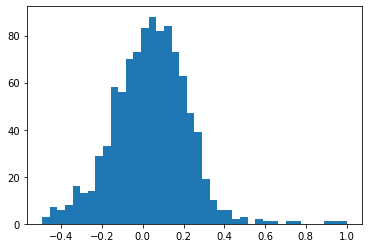

In [11]:
plt.hist( corr_array, bins=40)
plt.show

In [12]:
df0 = train_pts[:,0] - train_pts[point_index,0]
df1 = train_pts[:,1] - train_pts[point_index,1]
dr = np.sqrt( df0*df0 + df1*df1)

<function matplotlib.pyplot.show(close=None, block=None)>

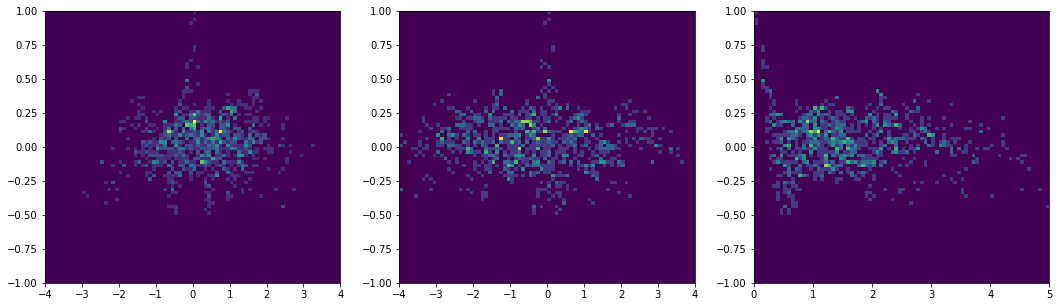

In [13]:
fig,ax = plt.subplots( 1, 3, figsize=(18,5))
ax[0].hist2d( df0[:ncalc], corr_array, bins=[80,80], range=([-4,4],[-1,1]))
ax[1].hist2d( df1[:ncalc], corr_array, bins=[80,80], range=([-4,4],[-1,1]))
ax[2].hist2d( dr[:ncalc], corr_array, bins=[80,80], range=([0,5],[-1,1]))
plt.show

In [14]:
%%time



for point_index in range(npoints) :
    
    if (point_index % (npoints/10) == 0 ) :
        print(" Working on point %3d" % point_index)
        
    this_point_corr_array = np.zeros(ncalc)
    
    for i in range(ncalc) :
        #if i == point_index : continue
        pair_cor = np.corrcoef( np.row_stack( (bootstrap_weights[:,point_index], bootstrap_weights[:,i]) ))
        this_point_corr_array[i] = pair_cor[0,1]
    
    if point_index == 0 :
        all_points_df0 = train_pts[:ncalc,0] - train_pts[point_index,0]
        all_points_df1 = train_pts[:ncalc,1] - train_pts[point_index,1]
        all_points_dr = np.sqrt( all_points_df0*all_points_df0 + all_points_df1*all_points_df1)
        all_points_corr_array = this_point_corr_array
        all_points_f0b = train_pts[:ncalc,0]
        all_points_f1b = train_pts[:ncalc,1]
    else :
        this_point_df0 = train_pts[:ncalc,0] - train_pts[point_index,0]
        this_point_df1 = train_pts[:ncalc,1] - train_pts[point_index,1]  
        this_point_dr = np.sqrt( this_point_df0*this_point_df0 + this_point_df1*this_point_df1 )
        all_points_df0 = np.append( all_points_df0, this_point_df0 )
        all_points_df1 = np.append( all_points_df1, this_point_df1 )
        all_points_dr = np.append( all_points_dr, this_point_dr )
        all_points_corr_array = np.append(all_points_corr_array, this_point_corr_array)
        all_points_f0b = np.append(all_points_f0b, train_pts[:ncalc,0] )
        all_points_f1b = np.append(all_points_f1b, train_pts[:ncalc,1] )


 Working on point   0
 Working on point 100
 Working on point 200
 Working on point 300
 Working on point 400
 Working on point 500
 Working on point 600
 Working on point 700
 Working on point 800
 Working on point 900
CPU times: user 56.2 s, sys: 5.65 s, total: 1min 1s
Wall time: 1min 1s


In [15]:
all_points_corr_array.shape

(1000000,)

In [16]:
all_points_df0.shape

(1000000,)

<function matplotlib.pyplot.show(close=None, block=None)>

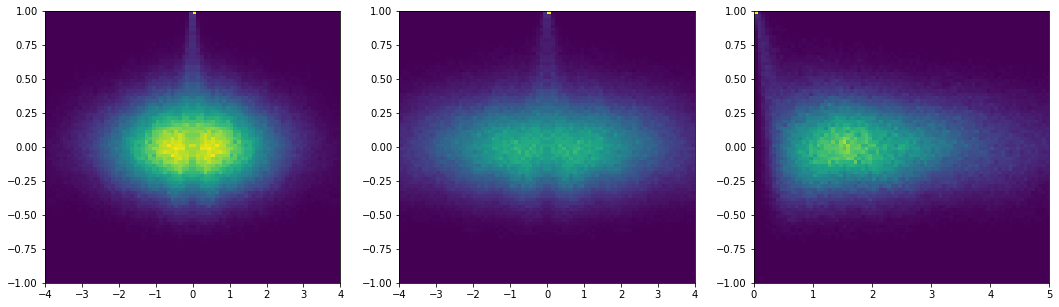

In [17]:
fig,ax = plt.subplots( 1, 3, figsize=(18,5))
ax[0].hist2d( all_points_df0, all_points_corr_array, bins=[80,80], range=([-4,4],[-1,1]))
ax[1].hist2d( all_points_df1, all_points_corr_array, bins=[80,80], range=([-4,4],[-1,1]))
ax[2].hist2d( all_points_dr, all_points_corr_array, bins=[80,80], range=([0,5],[-1,1]))

#plt.savefig('plots/correlation-vs-distance-%s.png' % sample_name, bbox_inches='tight')
#plt.savefig('plots/correlation-vs-distance-%s.pdf' % sample_name, bbox_inches='tight')

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

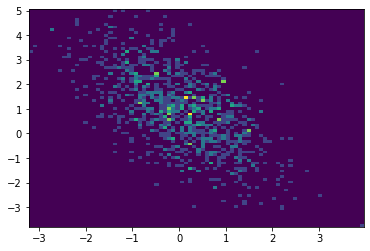

In [18]:
plt.hist2d( all_points_f0b, all_points_f1b, bins=[80,80] )
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

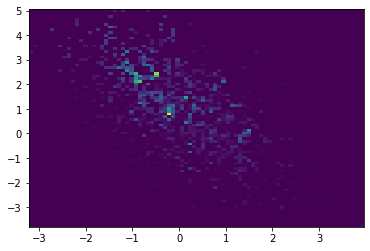

In [19]:
plt.hist2d( all_points_f0b[all_points_corr_array>0.8], all_points_f1b[all_points_corr_array>0.8], bins=[80,80] )
plt.show

## Save the output

In [20]:
with open( '%s/correlations.npy' % input_dir, 'wb') as f :
    np.save(f, all_points_df0)
    np.save(f, all_points_df1)
    np.save(f, all_points_dr)
    np.save(f, all_points_corr_array)
    

In [21]:
with open( '%s/correlation-points-feature-coords.npy' % input_dir, 'wb') as f :
    np.save(f, all_points_f0b)
    np.save(f, all_points_f1b)